In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import eig

# datos del sistema
Mc = 250
Kc = 15000
Bc = 1000
Mw = 40
Kw = 125000
Bw = 100
g = 9.81

# autovalores del sistema
A = [[0,1,0,0],[-(Kc+Kw)/Mw,-(Bc+Bw)/Mw,Kc/Mw,Bc/Mw],[0,0,0,1],[Kc/Mc,Bc/Mc,-Kc/Mc,-Bc/Mc]]
print(eig(A))
# funcion a integrar
def f(t,x):

    # entrada
    if t < 1:
        r=0
    elif t < 4:
        r = 0.05
    else:
        r = 0 
    dt = 0.001
      # entrada anterior
    
    if t-dt < 1:
        rant=0
    elif t-dt < 4:
        rant = 0.05
    else:
        rant = 0 
    dr = (r-rant)/dt
    f1 = x[1]
    f2 = -(Kc+Kw)/Mw*x[0] - (Bc+Bw)/Mw*x[1] + Kc/Mw*x[2]+Bc/Mw*x[3] + Kw/Mw * r + Bw/Mw * dr - g
    f3 = x[3]
    f4 = Kc/Mc*x[0]+Bc/Mc*x[1]-Kc/Mc*x[2]-Bc/Mc*x[3]-g
    return [f1,f2,f3,f4]

res = solve_ivp(f,[0,10],[-0.02275,0,-0.1863,0])

    


(array([-14.1285411+56.7801196j , -14.1285411-56.7801196j ,
        -1.6214589 +7.22065236j,  -1.6214589 -7.22065236j]), array([[-4.11658528e-03-0.01654383j, -4.11658528e-03+0.01654383j,
        -3.27490093e-03+0.0144655j , -3.27490093e-03-0.0144655j ],
       [ 9.97522081e-01+0.j        ,  9.97522081e-01-0.j        ,
        -9.91402635e-02-0.04710214j, -9.91402635e-02+0.04710214j],
       [-9.01797357e-04+0.00073975j, -9.01797357e-04-0.00073975j,
         2.91593557e-02+0.12985193j,  2.91593557e-02-0.12985193j],
       [-2.92619585e-02-0.06165574j, -2.92619585e-02+0.06165574j,
        -9.84896354e-01+0.j        , -9.84896354e-01-0.j        ]]))


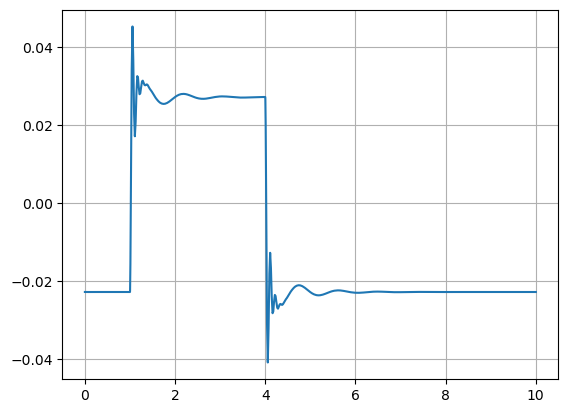

In [22]:
plt.plot(res.t,res.y[0])
plt.grid()

In [ ]:
ll=np.array([[-(Kc+Kw)/Mw,Kc/Mw],[Kc/Mc,-Kc/Mc]])
bb = np.array([g,g])